<a href="https://colab.research.google.com/github/rob-rubio/DogGAN/blob/alpha/DogGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


db_nparray_128x128.npy  drive/  sample_data/


In [4]:
import tensorflow as tf

tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from tensorflow.keras import backend

import matplotlib.pyplot as plt
import numpy as np

In [3]:
from glob import glob
from PIL import Image

In [ ]:
from glob import glob
from PIL import Image

mypath = '../datasets/dog_images/n02086910-papillon/*' # edit with the path to your data
files = glob(mypath)

x = []
for file in files:
    image = Image.open(file)
    new_image = image.resize((128, 128))
    x.append(np.array(new_image))

x = np.array(x)

In [5]:
from google.colab import files

uploaded = files.upload()

Saving db_nparray_128x128.npy to db_nparray_128x128.npy


KeyboardInterrupt: ignored

sample_data/


In [3]:
x = np.load('/content/drive/My Drive/content/data/dog_images/db_nparray_128x128.npy')

In [ ]:
x = np.load('/content/drive/My Drive/content/data/dog_images/db_nparray_32x32.npy')

In [12]:
x = x2.copy()

In [11]:
np.save('/content/drive/My Drive/content/data/dog_images/db_nparray_32x32.npy', x2)

In [ ]:
from glob import glob
from PIL import Image

mypath = '../datasets/dog_images/*/*' # edit with the path to your data

files = glob(mypath)
x = []
for file in files:
    image = Image.open(file)
    new_image = image.resize((128, 128))
    x.append(np.array(new_image))

x = np.array(x)

ValueError: could not broadcast input array from shape (128,128,3) into shape (128,128)

In [13]:
img_rows = 128
img_cols = 128
channels = 3
img_shape = (img_rows, img_cols, channels)

In [8]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

#Define input image dimensions
#Large images take too much time and resources.
img_rows = 128
img_cols = 128
channels = 3
img_shape = (img_rows, img_cols, channels)

##########################################################################
#Given input of noise (latent) vector, the Generator produces an image.
def build_generator():

    noise_shape = (100,) #1D array of size 100 (latent vector / noise)

#Define your generator network 
#Here we are only using Dense layers. But network can be complicated based
#on the application. For example, you can use VGG for super res. GAN.         

    model = Sequential()
    
    model.add(Dense(512, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1028))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)    #Generated image

    return Model(noise, img)

#Alpha — α is a hyperparameter which controls the underlying value to which the
#function saturates negatives network inputs.
#Momentum — Speed up the training
##########################################################################

#Given an input image, the Discriminator outputs the likelihood of the image being real.
    #Binary classification - true or false (we're calling it validity)

def build_discriminator():
    
    
    model = Sequential()
    
    # model.add(Conv2D(3, 3, input_shape=img_shape))
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    # model.add(Dropout(0.2))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    # model.add(Dropout(0.2))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    img = Input(shape=img_shape)
    validity = model(img)
    
    return Model(img, validity)
#The validity is the Discriminator’s guess of input being real or not.

[[[ 36  26  25]
  [ 37  27  26]
  [ 35  26  25]
  ...
  [ 41  21  12]
  [ 40  20  11]
  [ 41  20  11]]

 [[ 40  29  29]
  [ 38  27  27]
  [ 36  25  25]
  ...
  [ 43  23  14]
  [ 42  22  13]
  [ 40  20  11]]

 [[ 35  23  21]
  [ 32  20  18]
  [ 31  19  17]
  ...
  [ 45  25  16]
  [ 44  24  15]
  [ 41  23  13]]

 ...

 [[117  96  85]
  [119  99  88]
  [122 102  91]
  ...
  [117  90  78]
  [109  82  69]
  [107  79  66]]

 [[115  93  82]
  [120  98  87]
  [128 105  95]
  ...
  [108  80  68]
  [111  83  70]
  [109  81  67]]

 [[110  86  76]
  [113  89  79]
  [124 100  90]
  ...
  [103  75  63]
  [105  77  65]
  [105  77  64]]]


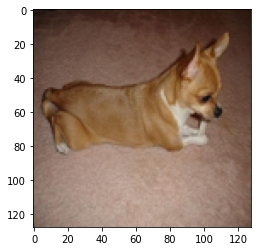

In [25]:
plt.imshow(x[5])
print(x[5])

In [46]:
#Now that we have constructed our two models it’s time to pit them against each other.
#We do this by defining a training function, loading the data set, re-scaling our training
#images and setting the ground truths. 
def train(epochs, batch_size=100, save_interval=50):

    # Convert to float and Rescale -1 to 1 (Can also do 0 to 1)
    X_train = (x.astype(np.float32) - 127.5) / 127.5

    #Add channels dimension. As the input to our gen and discr. has a shape 28x28x1.
    # X_train = np.expand_dims(X_train, axis=3) 

    half_batch = int(batch_size / 2)


#We then loop through a number of epochs to train our Discriminator by first selecting
#a random batch of images from our true dataset, generating a set of images from our
#Generator, feeding both set of images into our Discriminator, and finally setting the
#loss parameters for both the real and fake images, as well as the combined loss. 
    
    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random half batch of real images
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

 
        noise = np.random.normal(0, 1, (half_batch, 100))

        # Generate a half batch of fake images
        gen_imgs = generator.predict(noise)

        # Train the discriminator on real and fake images, separately
        #Research showed that separate training is more effective. 
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    #take average loss from real and fake images. 
    #
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) 

#And within the same loop we train our Generator, by setting the input noise and
#ultimately training the Generator to have the Discriminator label its samples as valid
#by specifying the gradient loss.
        # ---------------------
        #  Train Generator
        # ---------------------
#Create noise vectors as input for generator. 
#Create as many noise vectors as defined by the batch size. 
#Based on normal distribution. Output will be of size (batch size, 100)
        noise = np.random.normal(0, 1, (batch_size, 100)) 

        # The generator wants the discriminator to label the generated samples
        # as valid (ones)
        #This is where the genrator is trying to trick discriminator into believing
        #the generated image is true (hence value of 1 for y)
        valid_y = np.array([1] * batch_size) #Creates an array of all ones of size=batch size

        # Generator is part of combined where it got directly linked with the discriminator
        # Train the generator with noise as x and 1 as y. 
        # Again, 1 as the output as it is adversarial and if generator did a great
        #job of folling the discriminator then the output would be 1 (true)
        g_loss = combined.train_on_batch(noise, valid_y)


#Additionally, in order for us to keep track of our training process, we print the
#progress and save the sample image output depending on the epoch interval specified.  
# Plot the progress
        
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            # save_imgs(epoch)
            save_baseline(epoch)

#when the specific sample_interval is hit, we call the
#sample_image function. Which looks as follows.

def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5
    gen_imgs = gen_imgs*255

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            # axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].imshow(gen_imgs[cnt, :,:,0])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("images/mnist_%d.png" % epoch)
    plt.close()

def save_baseline(epoch):
    v = np.zeros(100)+0.5
    fimg = generator.predict(np.array(([v,v])))[0]
    fimg = (0.5+0.5*fimg)*255
    fimg = np.array(fimg, 'i')
    plt.imsave('./images/baseline_%d.png' % epoch, fimg.astype('uint8'))
    plt.close()
#This function saves our images for us to view


In [51]:
#Let us also define our optimizer for easy use later on.
#That way if you change your mind, you can change it easily here
optimizer = Adam(0.0002, 0.5)  #Learning rate and momentum.

# Build and compile the discriminator first. 
#Generator will be trained as part of the combined model, later. 
#pick the loss function and the type of metric to keep track.                 
#Binary cross entropy as we are doing prediction and it is a better
#loss function compared to MSE or other. 
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

#build and compile our Discriminator, pick the loss function

#SInce we are only generating (faking) images, let us not track any metrics.
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

##This builds the Generator and defines the input noise. 
#In a GAN the Generator network takes noise z as an input to produce its images.  
z = Input(shape=(100,))   #Our random input to the generator
img = generator(z)

#This ensures that when we combine our networks we only train the Generator.
#While generator training we do not want discriminator weights to be adjusted. 
#This Doesn't affect the above descriminator training.     
discriminator.trainable = False  

#This specifies that our Discriminator will take the images generated by our Generator
#and true dataset and set its output to a parameter called valid, which will indicate
#whether the input is real or not.  
valid = discriminator(img)  #Validity check on the generated image


#Here we combined the models and also set our loss function and optimizer. 
#Again, we are only training the generator here. 
#The ultimate goal here is for the Generator to fool the Discriminator.  
# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 128)     3584      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
batch_normalization_9 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 128)    

ValueError: ignored

In [11]:
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

In [13]:
ls

db_nparray_128x128.npy  drive/  images  sample_data/


In [14]:
train(epochs=10000, batch_size=200, save_interval=200)

Streaming output truncated to the last 5000 lines.
5000 [D loss: 0.336642, acc.: 85.00%] [G loss: 3.487926]
5001 [D loss: 0.375597, acc.: 84.00%] [G loss: 2.802829]
5002 [D loss: 0.402141, acc.: 81.00%] [G loss: 4.334104]
5003 [D loss: 0.604041, acc.: 69.00%] [G loss: 6.878322]
5004 [D loss: 0.749979, acc.: 74.00%] [G loss: 16.093914]
5005 [D loss: 1.770944, acc.: 57.00%] [G loss: 14.411635]
5006 [D loss: 2.855938, acc.: 42.00%] [G loss: 5.137863]
5007 [D loss: 0.433060, acc.: 81.00%] [G loss: 5.529020]
5008 [D loss: 1.052013, acc.: 58.00%] [G loss: 2.281212]
5009 [D loss: 0.666018, acc.: 68.50%] [G loss: 2.566607]
5010 [D loss: 0.469793, acc.: 78.50%] [G loss: 2.551409]
5011 [D loss: 0.554769, acc.: 78.00%] [G loss: 1.908944]
5012 [D loss: 0.451161, acc.: 79.00%] [G loss: 2.969075]
5013 [D loss: 0.698519, acc.: 68.00%] [G loss: 1.993143]
5014 [D loss: 0.440803, acc.: 81.00%] [G loss: 2.179604]
5015 [D loss: 0.573502, acc.: 70.50%] [G loss: 2.132104]
5016 [D loss: 0.599627, acc.: 71.00

In [ ]:
generator.save('generator_model_papillon.h5')  #Test the model on GAN4_predict...
#Change epochs back to 30K

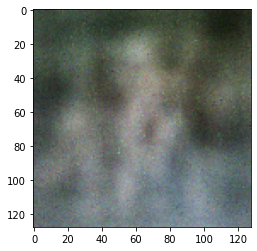

In [39]:
v = np.random.normal(size=100)
fimg = generator.predict(np.array(([v,v])))[0]
fimg = (0.5+0.5*fimg)*255
fimg = np.array(fimg, 'i')
plt.imshow(fimg)

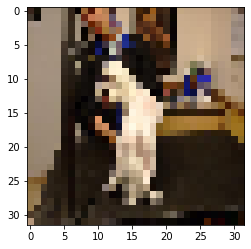

In [37]:
plt.imshow(x[500])

In [14]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [26]:


#Define input image dimensions
#Large images take too much time and resources.
img_rows = 32
img_cols = 32
channels = 3
img_shape = (img_rows, img_cols, channels)

##########################################################################
#Given input of noise (latent) vector, the Generator produces an image.
def build_generator():

    noise_shape = (100,) #1D array of size 10 (latent vector / noise)

#Define your generator network 
#Here we are only using Dense layers. But network can be complicated based
#on the application. For example, you can use VGG for super res. GAN.         

    model = Sequential()
    
    model.add(Dense(np.prod(img_shape), input_shape=noise_shape))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Reshape(img_shape))

    model.add(Conv2D(128, 5, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, 5, padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, 5, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, 5, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(3, 5, padding='same'))
    
    # model.add(Dense(np.prod(img_shape), activation='tanh'))
    # model.add(Reshape(img_shape))
    
    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)    #Generated image
    
    return Model(noise, img)

#Alpha — α is a hyperparameter which controls the underlying value to which the
#function saturates negatives network inputs.
#Momentum — Speed up the training
##########################################################################

#Given an input image, the Discriminator outputs the likelihood of the image being real.
    #Binary classification - true or false (we're calling it validity)

def build_discriminator():
    
    
    model = Sequential()
    
    model.add(Conv2D(5, 3, input_shape=img_shape, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(5, 3, input_shape=img_shape, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(5, 3, input_shape=img_shape, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(5, 3, input_shape=img_shape, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()
    
    img = Input(shape=img_shape)
    validity = model(img)
    
    return Model(img, validity)
#The validity is the Discriminator’s guess of input being real or not.

In [31]:
#Now that we have constructed our two models it’s time to pit them against each other.
#We do this by defining a training function, loading the data set, re-scaling our training
#images and setting the ground truths. 
def train(epochs, batch_size=100, save_interval=50):

    # Convert to float and Rescale -1 to 1 (Can also do 0 to 1)
    X_train = (x.astype(np.float32) - 127.5) / 127.5

    #Add channels dimension. As the input to our gen and discr. has a shape 28x28x1.
    # X_train = np.expand_dims(X_train, axis=3) 

    half_batch = int(batch_size / 2)


#We then loop through a number of epochs to train our Discriminator by first selecting
#a random batch of images from our true dataset, generating a set of images from our
#Generator, feeding both set of images into our Discriminator, and finally setting the
#loss parameters for both the real and fake images, as well as the combined loss. 
    
    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random half batch of real images
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

 
        noise = np.random.normal(0, 1, (half_batch, 100))

        # Generate a half batch of fake images
        gen_imgs = generator.predict(noise)

        # Train the discriminator on real and fake images, separately
        #Research showed that separate training is more effective. 
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    #take average loss from real and fake images. 
    #
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) 

#And within the same loop we train our Generator, by setting the input noise and
#ultimately training the Generator to have the Discriminator label its samples as valid
#by specifying the gradient loss.
        # ---------------------
        #  Train Generator
        # ---------------------
#Create noise vectors as input for generator. 
#Create as many noise vectors as defined by the batch size. 
#Based on normal distribution. Output will be of size (batch size, 100)
        noise = np.random.normal(0, 1, (batch_size, 100)) 

        # The generator wants the discriminator to label the generated samples
        # as valid (ones)
        #This is where the genrator is trying to trick discriminator into believing
        #the generated image is true (hence value of 1 for y)
        valid_y = np.array([1] * batch_size) #Creates an array of all ones of size=batch size

        # Generator is part of combined where it got directly linked with the discriminator
        # Train the generator with noise as x and 1 as y. 
        # Again, 1 as the output as it is adversarial and if generator did a great
        #job of folling the discriminator then the output would be 1 (true)
        g_loss = combined.train_on_batch(noise, valid_y)


#Additionally, in order for us to keep track of our training process, we print the
#progress and save the sample image output depending on the epoch interval specified.  
# Plot the progress
        
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            # save_imgs(epoch)
            save_baseline(epoch)

#when the specific sample_interval is hit, we call the
#sample_image function. Which looks as follows.

def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5
    gen_imgs = gen_imgs*255

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            # axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].imshow(gen_imgs[cnt, :,:,0])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("images/mnist_%d.png" % epoch)
    plt.close()

def save_baseline(epoch):
    v = np.zeros(100)+0.5
    fimg = generator.predict(np.array(([v,v])))[0]
    fimg = (0.5+0.5*fimg)*255
    fimg = np.array(fimg, 'i')
    plt.imsave('./images/baseline_%d.png' % epoch, fimg.astype('uint8'))
    plt.close()
#This function saves our images for us to view


In [ ]:
#Let us also define our optimizer for easy use later on.
#That way if you change your mind, you can change it easily here
optimizer = Adam(0.0002, 0.5)  #Learning rate and momentum.

# Build and compile the discriminator first. 
#Generator will be trained as part of the combined model, later. 
#pick the loss function and the type of metric to keep track.                 
#Binary cross entropy as we are doing prediction and it is a better
#loss function compared to MSE or other. 
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

#build and compile our Discriminator, pick the loss function

#SInce we are only generating (faking) images, let us not track any metrics.
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

##This builds the Generator and defines the input noise. 
#In a GAN the Generator network takes noise z as an input to produce its images.  
z = Input(shape=(100,))   #Our random input to the generator
img = generator(z)

#This ensures that when we combine our networks we only train the Generator.
#While generator training we do not want discriminator weights to be adjusted. 
#This Doesn't affect the above descriminator training.     
discriminator.trainable = False  

#This specifies that our Discriminator will take the images generated by our Generator
#and true dataset and set its output to a parameter called valid, which will indicate
#whether the input is real or not.  
valid = discriminator(img)  #Validity check on the generated image


#Here we combined the models and also set our loss function and optimizer. 
#Again, we are only training the generator here. 
#The ultimate goal here is for the Generator to fool the Discriminator.  
# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity

In [33]:
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
train(epochs=10000, batch_size=200, save_interval=200)